In [1]:
import json
import os
from pycocotools.coco import COCO
from PIL import Image
import matplotlib.pyplot as plt

# 指定路径
coco_dir = "/home/sunj11/Documents/VLM/BLIP/dataset/coco/val2014"
captions_file = "/home/sunj11/Documents/VLM/BLIP/dataset/coco/annotations/captions_val2014.json"
instances_file = "/home/sunj11/Documents/VLM/BLIP/dataset/coco/annotations/instances_val2014.json"

# 加载COCO的caption和目标检测的注释文件
coco_captions = COCO(captions_file)
coco_instances = COCO(instances_file)

# 获取所有图像的ID
image_ids = coco_captions.getImgIds()


loading annotations into memory...
Done (t=0.25s)
creating index...
index created!
loading annotations into memory...
Done (t=3.95s)
creating index...
index created!


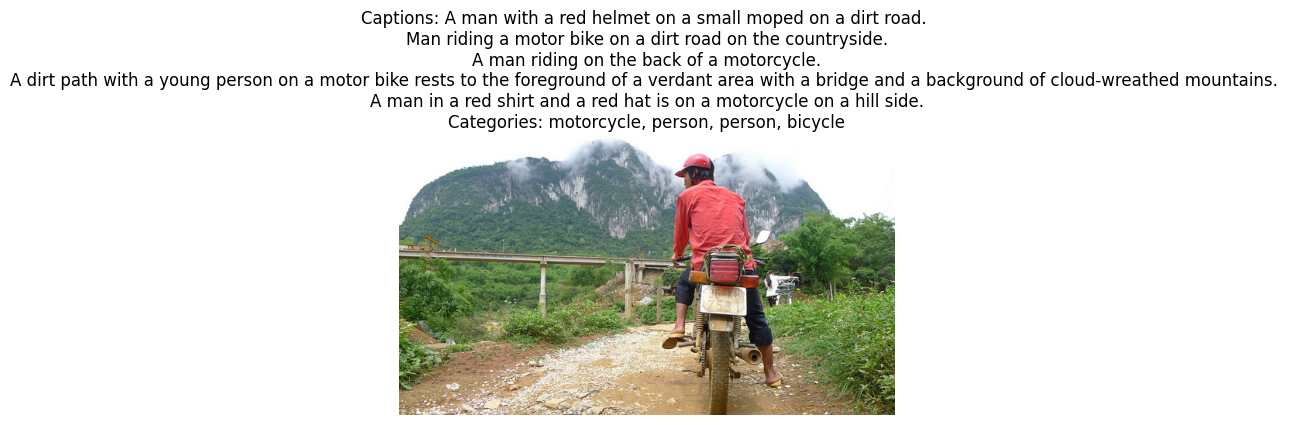

In [15]:

# 遍历所有图像并获取其对应的captions和类别
for img_id in image_ids:
    # 获取图像信息
    img_info = coco_captions.loadImgs(img_id)[0]
    img_filename = img_info['file_name']
    img_path = os.path.join(coco_dir, img_filename)
    
    # 获取图像的captions
    ann_ids = coco_captions.getAnnIds(imgIds=img_id)
    anns = coco_captions.loadAnns(ann_ids)
    
    # 获取目标检测的类别信息
    instance_ann_ids = coco_instances.getAnnIds(imgIds=img_id)
    instance_anns = coco_instances.loadAnns(instance_ann_ids)
    
    # 获取图像的类别名
    categories = []
    for ann in instance_anns:
        category_id = ann['category_id']
        category_name = coco_instances.loadCats(category_id)[0]['name']
        categories.append(category_name)
    
    # 读取图像
    img = Image.open(img_path)
    
    # 显示图像
    plt.imshow(img)
    plt.axis('off')  # 不显示坐标轴
    
    # 显示对应的caption和类别
    captions = [ann['caption'] for ann in anns]
    caption_text = "\n".join(captions)
    category_text = ", ".join(categories)
    
    # 标题中显示caption和类别
    plt.title(f"Captions: {caption_text}\nCategories: {category_text}")
    plt.show()
    
    # 如果只需要显示一个图像和caption，可以在这里添加break
    break

In [12]:
captions

['A man with a red helmet on a small moped on a dirt road. ',
 'Man riding a motor bike on a dirt road on the countryside.',
 'A man riding on the back of a motorcycle.',
 'A dirt path with a young person on a motor bike rests to the foreground of a verdant area with a bridge and a background of cloud-wreathed mountains. ',
 'A man in a red shirt and a red hat is on a motorcycle on a hill side.']

In [ ]:
img.convert('RGB').shape

In [24]:
from PIL import Image
import requests
import torch
from torchvision import transforms
from torchvision.transforms.functional import InterpolationMode

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def load_demo_image(image_size):
    # img_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg' 
    # raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')   
    raw_image = Image.open(img_path).convert('RGB')
    w,h = raw_image.size
    display(raw_image.resize((w//5,h//5)))
    
    transform = transforms.Compose([
        transforms.Resize((image_size,image_size),interpolation=InterpolationMode.BICUBIC),
        transforms.ToTensor(),
        transforms.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711))
        ]) 
    image = transform(raw_image).unsqueeze(0).to(device)   
    return image

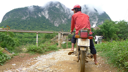

In [27]:
image = load_demo_image(224)

In [30]:
from models.blip import blip_decoder

image_size = 224
model_capfilt_large_path = '/home/sunj11/Documents/VLM/BLIP/pretrain/model_base_capfilt_large.pth'
model_base_path = '/home/sunj11/Documents/VLM/BLIP/pretrain/model_base.pth'


In [40]:
import json

file_path = "datasets/sbu-captions-all.json"

# 读取 JSON 文件
with open(file_path, "r", encoding="utf-8") as f:
    sbu_raw = json.load(f)  # 假设 JSON 是一个列表或字典



In [44]:
list(sbu_raw.keys())


['image_urls', 'user_ids', 'captions']

In [57]:
sbu_raw['captions'][0]
sbu_raw['image_urls'][0]

'http://static.flickr.com/1354/1015682390_1ef4c4cede.jpg'

In [58]:
len(sbu_raw['captions'])

1000000

In [17]:
import json

file_path = "dataset2/ccs_synthetic_filtered.json"

# 读取 JSON 文件
with open(file_path, "r", encoding="utf-8") as f:
    sbu_filter = json.load(f)  # 假设 JSON 是一个列表或字典



Caption: an empty chair is positioned against a curtain


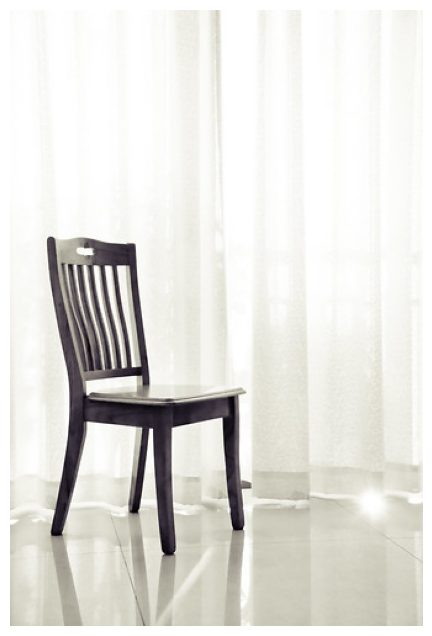

In [19]:
import requests
from PIL import Image
import matplotlib.pyplot as plt
from io import BytesIO

def display_image_and_caption(item):
    # 打印 caption
    print("Caption:", item['caption'])
    
    try:
        # 尝试获取图片
        response = requests.get(item['url'])
        if response.status_code == 200:
            # 从响应内容创建图片
            img = Image.open(BytesIO(response.content))
            
            # 显示图片
            plt.figure(figsize=(10, 8))
            plt.imshow(img)
            plt.axis('off')
            plt.show()
        else:
            print(f"无法访问图片，HTTP状态码: {response.status_code}")
            
    except Exception as e:
        print(f"获取图片时出错: {str(e)}")

# 显示指定的图片和说明
display_image_and_caption(sbu_filter[0])

In [7]:
import requests
from PIL import Image
import matplotlib.pyplot as plt
from io import BytesIO

def display_image_and_caption(image_url, caption):
   # 打印 caption
   print("Caption:", caption)
   
   try:
       # 尝试获取图片
       response = requests.get(image_url)
       if response.status_code == 200:
           # 从响应内容创建图片
           img = Image.open(BytesIO(response.content))
           
           # 显示图片
           plt.figure(figsize=(10, 8))
           plt.imshow(img)
           plt.axis('off')
           plt.show()
       else:
           print(f"无法访问图片，HTTP状态码: {response.status_code}")
           
   except Exception as e:
       print(f"获取图片时出错: {str(e)}")

# 显示指定的图片和说明
image_url = sbu_raw['image_urls'][2]
caption = sbu_raw['captions'][2]
display_image_and_caption(image_url, caption)

Caption: Yellow flower surrounded by scorched black stalks - Moore Nature Reserve
无法访问图片，HTTP状态码: 404


In [8]:
len(sbu_raw['captions'])

1000000

In [9]:
import requests
import torch
from tqdm import tqdm
from transformers import CLIPProcessor, CLIPModel
import numpy as np
from PIL import Image
from io import BytesIO

def check_url_valid(url):
    try:
        response = requests.get(url, timeout=5)
        if response.status_code == 200:
            Image.open(BytesIO(response.content))
            return True
    except:
        return False
    return False

def get_valid_samples(data, is_raw=True, num_samples=10):
    valid_samples = []
    if is_raw:
        for i in range(len(data['image_urls'])):
            if len(valid_samples) >= num_samples:
                break
            url = data['image_urls'][i]
            if check_url_valid(url):
                valid_samples.append({
                    'url': url,
                    'caption': data['captions'][i]
                })
    else:
        for item in data:
            if len(valid_samples) >= num_samples:
                break
            if check_url_valid(item['url']):
                valid_samples.append({
                    'url': item['url'],
                    'caption': item['caption']
                })
    
    return valid_samples

def calculate_clip_similarity(samples):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
    processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
    
    similarities = []
    
    for sample in samples:
        try:
            response = requests.get(sample['url'])
            image = Image.open(BytesIO(response.content))
            
            inputs = processor(
                images=image,
                text=[sample['caption']],
                return_tensors="pt",
                padding=True
            ).to(device)
            
            with torch.no_grad():
                outputs = model(**inputs)
                similarity = outputs.logits_per_image.item()
                
            similarities.append(similarity)
            
        except Exception as e:
            similarities.append(np.nan)
            continue
    
    return np.array(similarities)

# 获取样本并计算相似度
raw_samples = get_valid_samples(sbu_raw, is_raw=True, num_samples=10)
filtered_samples = get_valid_samples(sbu_filter, is_raw=False, num_samples=10)

# 计算并保存相似度矩阵
raw_similarities = calculate_clip_similarity(raw_samples)
filtered_similarities = calculate_clip_similarity(filtered_samples)

# raw_similarities 和 filtered_similarities 现在是两个numpy数组
# 每个数组包含10个相似度值
print("Raw similarities shape:", raw_similarities.shape)
print("Filtered similarities shape:", filtered_similarities.shape)

/home/sunj11/anaconda3/envs/lavis/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/sunj11/anaconda3/envs/lavis/lib/python3.8/site-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/sunj11/anaconda3/envs/lavis/lib/python3.8/site-packages/transformers/modeling_utils.py:415: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models fo

Raw similarities shape: (10,)
Filtered similarities shape: (10,)


In [10]:
raw_similarities.mean()

29.961970710754393

In [11]:
filtered_similarities.mean()

30.52550506591797

In [12]:
import requests
import torch
from tqdm import tqdm
from transformers import CLIPProcessor, CLIPModel
import numpy as np
from PIL import Image
from io import BytesIO
import random

def calculate_clip_similarity(url, caption, model, processor, device):
    try:
        response = requests.get(url, timeout=5)
        if response.status_code == 200:
            image = Image.open(BytesIO(response.content))
            
            inputs = processor(
                images=image,
                text=[caption],
                return_tensors="pt",
                padding=True
            ).to(device)
            
            with torch.no_grad():
                outputs = model(**inputs)
                return outputs.logits_per_image.item()
    except:
        return np.nan
    return np.nan

# 设置设备和模型
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# 随机采样并计算相似度
raw_indices = random.sample(range(len(sbu_raw['image_urls'])), 10)
filtered_indices = random.sample(range(len(sbu_filter)), 10)

# 初始化相似度数组
raw_similarities = np.zeros(1000)
filtered_similarities = np.zeros(1000)

# 计算raw数据集相似度
for i, idx in enumerate(raw_indices):
    similarity = calculate_clip_similarity(
        sbu_raw['image_urls'][idx],
        sbu_raw['captions'][idx],
        model, processor, device
    )
    raw_similarities[i] = similarity

# 计算filtered数据集相似度
for i, idx in enumerate(filtered_indices):
    similarity = calculate_clip_similarity(
        sbu_filter[idx]['url'],
        sbu_filter[idx]['caption'],
        model, processor, device
    )
    filtered_similarities[i] = similarity

# raw_similarities 和 filtered_similarities 现在包含1000个值，
# 无效的URL对应的值为nan

In [16]:
import requests
import torch
from tqdm import tqdm
from transformers import CLIPProcessor, CLIPModel
import numpy as np
from PIL import Image
from io import BytesIO
import random

def calculate_clip_similarity(url, caption, model, processor, device):
   try:
       response = requests.get(url, timeout=5)
       if response.status_code == 200:
           image = Image.open(BytesIO(response.content))
           
           inputs = processor(
               images=image,
               text=[caption],
               return_tensors="pt",
               padding=True
           ).to(device)
           
           with torch.no_grad():
               outputs = model(**inputs)
               return outputs.logits_per_image.item()
   except:
       return np.nan
   return np.nan

# 设置设备和模型
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Loading CLIP model...")
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# 随机采样并计算相似度
raw_indices = random.sample(range(len(sbu_raw['image_urls'])), 10)
filtered_indices = random.sample(range(len(sbu_filter)), 10)

# 初始化相似度数组
raw_similarities = np.zeros(10)
filtered_similarities = np.zeros(10)

# 计算raw数据集相似度
print("Processing raw dataset samples...")
for i, idx in tqdm(enumerate(raw_indices), total=10):
   similarity = calculate_clip_similarity(
       sbu_raw['image_urls'][idx],
       sbu_raw['captions'][idx],
       model, processor, device
   )
   raw_similarities[i] = similarity

# 计算filtered数据集相似度
print("Processing filtered dataset samples...")
for i, idx in tqdm(enumerate(filtered_indices), total=10):
   similarity = calculate_clip_similarity(
       sbu_filter[idx]['url'],
       sbu_filter[idx]['caption'],
       model, processor, device
   )
   filtered_similarities[i] = similarity

print("Processing complete!")

Loading CLIP model...


/home/sunj11/anaconda3/envs/lavis/lib/python3.8/site-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/sunj11/anaconda3/envs/lavis/lib/python3.8/site-packages/transformers/modeling_utils.py:415: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly

Processing raw dataset samples...


100%|██████████| 10/10 [00:02<00:00,  3.85it/s]


Processing filtered dataset samples...


100%|██████████| 10/10 [00:02<00:00,  4.75it/s]

Processing complete!


nan

In [18]:
filtered_similarities

array([        nan, 30.88179779,         nan, 35.51945877, 29.6335659 ,
       31.55039215, 33.06708145,         nan, 28.81486702,         nan])

In [6]:
import os
import json
import requests
from tqdm import tqdm
import hashlib
from concurrent.futures import ThreadPoolExecutor
import random

def create_unique_id(url, caption):
   unique_str = f"{url}{caption}"
   return hashlib.md5(unique_str.encode()).hexdigest()

def download_and_save(args):
   url, caption, img_folder = args
   
   unique_id = create_unique_id(url, caption)
   image_filename = f"{unique_id}.jpg"
   image_path = os.path.join(img_folder, image_filename)
   
   if os.path.exists(image_path):
       return unique_id, True
   
   try:
       response = requests.get(url, timeout=5)
       if response.status_code == 200:
           with open(image_path, 'wb') as f:
               f.write(response.content)
           return unique_id, True
   except:
       return unique_id, False
   
   return unique_id, False

# 创建两个独立的目录结构
raw_dir = "SBURAW"
filter_dir = "SBUfilter"
raw_img_folder = os.path.join(raw_dir, "images")
filter_img_folder = os.path.join(filter_dir, "images")
os.makedirs(raw_img_folder, exist_ok=True)
os.makedirs(filter_img_folder, exist_ok=True)

# 随机选择1000个样本
raw_indices = random.sample(range(len(sbu_raw['image_urls'])), 1000)
filter_indices = random.sample(range(len(sbu_filter)), 1000)

# 准备下载参数
raw_args = [(sbu_raw['image_urls'][i], sbu_raw['captions'][i], raw_img_folder) 
           for i in raw_indices]
filter_args = [(sbu_filter[i]['url'], sbu_filter[i]['caption'], filter_img_folder) 
              for i in filter_indices]

# 初始化数据记录
raw_info = []
filter_info = []

# 使用线程池并行下载
with ThreadPoolExecutor(max_workers=32) as executor:
   # 处理raw数据集
   print("Processing RAW dataset (1000 samples)...")
   for url, caption, _ in tqdm(raw_args):
       unique_id, success = download_and_save((url, caption, raw_img_folder))
       if success:
           raw_info.append({
               "image_id": unique_id,
               "caption": caption,
               "original_url": url
           })
   
   # 处理filtered数据集
   print("Processing FILTERED dataset (1000 samples)...")
   for url, caption, _ in tqdm(filter_args):
       unique_id, success = download_and_save((url, caption, filter_img_folder))
       if success:
           filter_info.append({
               "image_id": unique_id,
               "caption": caption,
               "original_url": url
           })

# 分别保存两个数据集的信息
raw_info_path = os.path.join(raw_dir, "raw_info.json")
filter_info_path = os.path.join(filter_dir, "filter_info.json")

with open(raw_info_path, 'w') as f:
   json.dump(raw_info, f, indent=2)

with open(filter_info_path, 'w') as f:
   json.dump(filter_info, f, indent=2)

print(f"Successfully downloaded raw: {len(raw_info)} images")
print(f"Successfully downloaded filtered: {len(filter_info)} images")

Processing RAW dataset (1000 samples)...


  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [02:54<00:00,  5.73it/s]


Processing FILTERED dataset (1000 samples)...


100%|██████████| 1000/1000 [06:40<00:00,  2.50it/s]

Successfully downloaded raw: 559 images
Successfully downloaded filtered: 724 images


In [ ]:
import torch
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
from tqdm import tqdm
import json
import os
import numpy as np

# 加载json信息
with open('SBURAW/raw_info.json', 'r') as f:
    raw_info = json.load(f)

with open('SBUfilter/filter_info.json', 'r') as f:
    filter_info = json.load(f)

# 设置设备和加载模型
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Loading CLIP model...")
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

def calculate_similarities(info_list, img_folder):
    similarities = []
    
    for item in tqdm(info_list):
        try:
            # 加载图片
            image_path = os.path.join(img_folder, f"{item['image_id']}.jpg")
            if not os.path.exists(image_path):
                continue
                
            image = Image.open(image_path)
            
            # 处理图片和文本
            inputs = processor(
                images=image,
                text=[item['caption']],
                return_tensors="pt",
                padding=True
            ).to(device)
            
            # 计算相似度
            with torch.no_grad():
                outputs = model(**inputs)
                similarity = outputs.logits_per_image.item()
                
            similarities.append({
                'image_id': item['image_id'],
                'caption': item['caption'],
                'similarity': similarity
            })
            
        except Exception as e:
            print(f"Error processing {item['image_id']}: {str(e)}")
            continue
            
    return similarities

# 计算两个数据集的相似度
print("Computing similarities for RAW dataset...")
raw_similarities = calculate_similarities(raw_info, "SBURAW/images")

print("Computing similarities for FILTERED dataset...")
filter_similarities = calculate_similarities(filter_info, "SBUfilter/images")

# 转换为numpy数组以便计算统计信息
raw_scores = np.array([s['similarity'] for s in raw_similarities])
filter_scores = np.array([s['similarity'] for s in filter_similarities])

# 打印统计信息
print("\nRAW Dataset Statistics:")
print(f"Number of samples: {len(raw_scores)}")
print(f"Mean similarity: {np.mean(raw_scores):.4f}")
print(f"Std similarity: {np.std(raw_scores):.4f}")
print(f"Min similarity: {np.min(raw_scores):.4f}")
print(f"Max similarity: {np.max(raw_scores):.4f}")

print("\nFILTERED Dataset Statistics:")
print(f"Number of samples: {len(filter_scores)}")
print(f"Mean similarity: {np.mean(filter_scores):.4f}")
print(f"Std similarity: {np.std(filter_scores):.4f}")
print(f"Min similarity: {np.min(filter_scores):.4f}")
print(f"Max similarity: {np.max(filter_scores):.4f}")

# 保存结果
raw_result_path = os.path.join("SBURAW", "similarities.json")
filter_result_path = os.path.join("SBUfilter", "similarities.json")

with open(raw_result_path, 'w') as f:
    json.dump(raw_similarities, f, indent=2)

with open(filter_result_path, 'w') as f:
    json.dump(filter_similarities, f, indent=2)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))

# 计算每个数据点的权重（使频率和为1）
weights_raw = np.ones_like(raw_scores) / len(raw_scores)
weights_filter = np.ones_like(filter_scores) / len(filter_scores)

# 绘制直方图
plt.hist(raw_scores/100, bins=50, alpha=0.5, weights=weights_raw, 
         label='Raw Data', edgecolor='black')
plt.hist(filter_scores/100, bins=50, alpha=0.5, weights=weights_filter, 
         label='Filtered Data', edgecolor='black')

plt.xlabel('Cosine Similarity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Image-Text Cosine Similarities', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# 设置坐标轴刻度字体大小
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# 可选：设置x轴范围，使图像更集中
plt.xlim(min(np.min(raw_scores/100), np.min(filter_scores/100)), 
         max(np.max(raw_scores/100), np.max(filter_scores/100)))

plt.tight_layout()
plt.show()

# 打印一些基本统计信息
print("\nRAW Data Statistics:")
print(f"Mean: {np.mean(raw_scores):.4f}")
print(f"Std: {np.std(raw_scores):.4f}")

print("\nFiltered Data Statistics:")
print(f"Mean: {np.mean(filter_scores):.4f}")
print(f"Std: {np.std(filter_scores):.4f}")

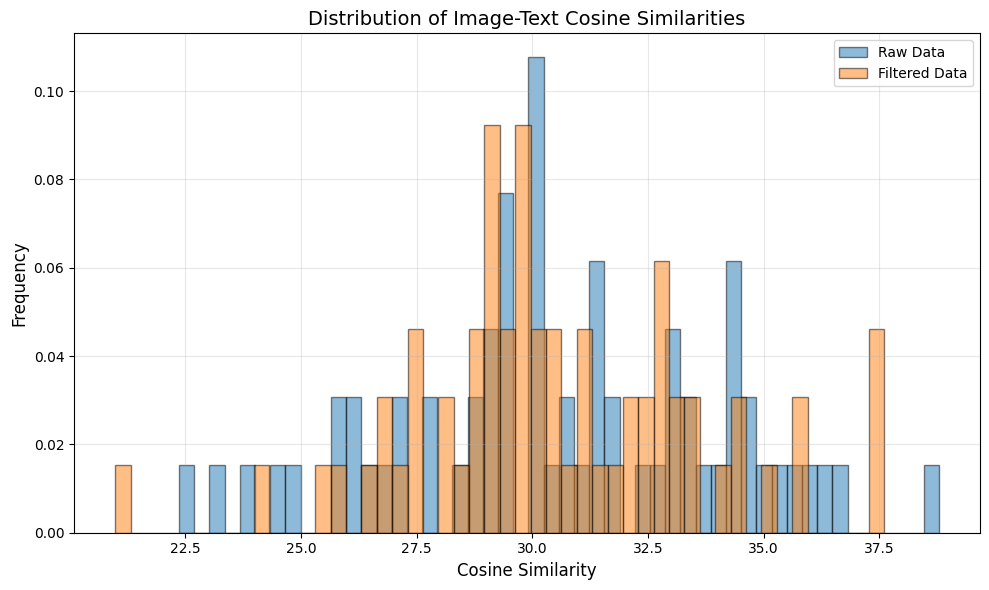


Sample Count for both datasets: 65


In [7]:
import matplotlib.pyplot as plt
import numpy as np

# 确保两组数据长度相同
min_length = min(len(raw_scores), len(filter_scores))
raw_scores = raw_scores[:min_length]
filter_scores = filter_scores[:min_length]

plt.figure(figsize=(10, 6))

# 计算权重，使频率和为1
weights = np.ones_like(raw_scores) / len(raw_scores)  # 两组数据长度现在相同，用任意一个都可以

# 绘制直方图
plt.hist(raw_scores, bins=50, alpha=0.5, weights=weights,
        label='Raw Data', edgecolor='black')
plt.hist(filter_scores, bins=50, alpha=0.5, weights=weights,
        label='Filtered Data', edgecolor='black')

plt.xlabel('Cosine Similarity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Image-Text Cosine Similarities', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

# 打印样本数量信息
print(f"\nSample Count for both datasets: {len(raw_scores)}")

In [3]:
import requests
import os
from tqdm import tqdm

def download_file(url, filepath):
    # 创建目录（如果不存在）
    os.makedirs(os.path.dirname(filepath), exist_ok=True)
    
    # 获取文件大小
    response = requests.get(url, stream=True)
    total_size = int(response.headers.get('content-length', 0))
    
    # 检查是否已经有部分文件
    initial_pos = os.path.getsize(filepath) if os.path.exists(filepath) else 0
    mode = 'ab' if initial_pos > 0 else 'wb'
    
    # 设置断点续传的header
    headers = {}
    if initial_pos:
        headers['Range'] = f'bytes={initial_pos}-'
    
    # 开始下载
    print(f"Downloading to {filepath}")
    response = requests.get(url, stream=True, headers=headers)
    
    with open(filepath, mode) as f:
        with tqdm(
            total=total_size,
            initial=initial_pos,
            unit='iB',
            unit_scale=True,
            unit_divisor=1024,
        ) as pbar:
            for data in response.iter_content(chunk_size=8192):
                size = f.write(data)
                pbar.update(size)

# 下载文件
url = "https://storage.googleapis.com/conceptual_12m/cc12m.tsv"
filepath = "datasets/cc12m.tsv"

try:
    download_file(url, filepath)
    print(f"Download completed: {filepath}")
except Exception as e:
    print(f"Error during download: {str(e)}")

100%|██████████| 2.52G/2.52G [00:14<00:00, 188MiB/s] 

Download completed: datasets/cc12m.tsv


In [4]:
# 读取TSV文件
with open('datasets/cc12m.tsv', 'r', encoding='utf-8') as f:
    first_line = f.readline().strip()  # 读取第一行并去除首尾空白

# 用制表符分割
url, caption = first_line.split('\t')

print("URL:", url)
print("Caption:", caption)

URL: https://chairish-prod.freetls.fastly.net/image/product/sized/f8d905b6-6c37-4378-a1bd-946584db05ee/design-within-reach-ivory-slipper-chairs-a-pair-0773?aspect=fit&width=640&height=640
Caption: Metal Design Within Reach Ivory Slipper Chairs - a Pair For Sale - Image 7 of 10


In [10]:
import os
import json
import requests
from tqdm import tqdm
import hashlib
from concurrent.futures import ThreadPoolExecutor
import random

def create_unique_id(url, caption):
  unique_str = f"{url}{caption}"
  return hashlib.md5(unique_str.encode()).hexdigest()

def download_and_save(args):
  url, caption, img_folder = args
  
  unique_id = create_unique_id(url, caption)
  image_filename = f"{unique_id}.jpg"
  image_path = os.path.join(img_folder, image_filename)
  
  if os.path.exists(image_path):
      return unique_id, True
  
  try:
      response = requests.get(url, timeout=5)
      if response.status_code == 200:
          with open(image_path, 'wb') as f:
              f.write(response.content)
          return unique_id, True
  except:
      return unique_id, False
  
  return unique_id, False

# 读取 TSV 文件
tsv_path = "datasets/cc12m.tsv"
raw_data = []
with open(tsv_path, 'r', encoding='utf-8') as f:
   for line in f:
       url, caption = line.strip().split('\t')
       raw_data.append({
           'url': url,
           'caption': caption
       })

# 创建目录结构
raw_dir = "SBURAW"
raw_img_folder = os.path.join(raw_dir, "images")
os.makedirs(raw_img_folder, exist_ok=True)

# 随机选择10000个样本
raw_indices = random.sample(range(len(raw_data)), 10000)

# 准备下载参数
raw_args = [(raw_data[i]['url'], raw_data[i]['caption'], raw_img_folder) 
          for i in raw_indices]

# 初始化数据记录
raw_info = []

# 使用线程池并行下载
with ThreadPoolExecutor(max_workers=32) as executor:
  # 处理raw数据集
  print("Processing CC12M dataset (10000 samples)...")
  for url, caption, _ in tqdm(raw_args):
      unique_id, success = download_and_save((url, caption, raw_img_folder))
      if success:
          raw_info.append({
              "image_id": unique_id,
              "caption": caption,
              "original_url": url
          })

# 保存数据集信息
raw_info_path = os.path.join(raw_dir, "raw_info.json")
with open(raw_info_path, 'w') as f:
  json.dump(raw_info, f, indent=2)

print(f"Successfully downloaded raw: {len(raw_info)} images")

Processing CC12M dataset (10000 samples)...


100%|██████████| 10000/10000 [1:23:05<00:00,  2.01it/s] 


Successfully downloaded raw: 6687 images


In [ ]:
# 加载json信息
with open('SBURAW/raw_info.json', 'r') as f:
    raw_info = json.load(f)

# 计算raw数据集的相似度
print("Computing similarities for RAW dataset...")
raw_similarities = calculate_similarities(raw_info, "SBURAW/images")

# 转换为numpy数组以便计算统计信息
raw_scores = np.array([s['similarity'] for s in raw_similarities])

# 打印统计信息
print("\nRAW Dataset Statistics:")
print(f"Number of samples: {len(raw_scores)}")
print(f"Mean similarity: {np.mean(raw_scores):.4f}")
print(f"Std similarity: {np.std(raw_scores):.4f}")
print(f"Min similarity: {np.min(raw_scores):.4f}")
print(f"Max similarity: {np.max(raw_scores):.4f}")

# 保存结果
raw_result_path = os.path.join("SBURAW", "similarities.json")
with open(raw_result_path, 'w') as f:
    json.dump(raw_similarities, f, indent=2)

In [12]:
# 打印统计信息
print("\nRAW Dataset Statistics:")
print(f"Number of samples: {len(raw_scores)}")
print(f"Mean similarity: {np.mean(raw_scores):.4f}")
print(f"Std similarity: {np.std(raw_scores):.4f}")
print(f"Min similarity: {np.min(raw_scores):.4f}")
print(f"Max similarity: {np.max(raw_scores):.4f}")


RAW Dataset Statistics:
Number of samples: 6364
Mean similarity: 30.8283
Std similarity: 4.2875
Min similarity: 12.5289
Max similarity: 47.3707


In [13]:
print("\nFiltered Data Statistics:")
print(f"Mean: {np.mean(filter_scores):.4f}")
print(f"Std: {np.std(filter_scores):.4f}")


Filtered Data Statistics:
Mean: 30.5347
Std: 3.1342


In [16]:
import json

# 读取json文件
with open('datasets/ccs_filtered.json', 'r', encoding='utf-8') as f:
   ccs_data = json.load(f)

# 显示第一个样本的信息
first_item = ccs_data[1]
print("URL:", first_item['url'])
print("Caption:", first_item['caption'])

URL: http://static.flickr.com/3348/3183472382_156bcbc461.jpg
Caption: the plate near the door almost makes it look like the cctv camera is the logo of the hotel


Caption: a house being built on a construction site with wood and plastic


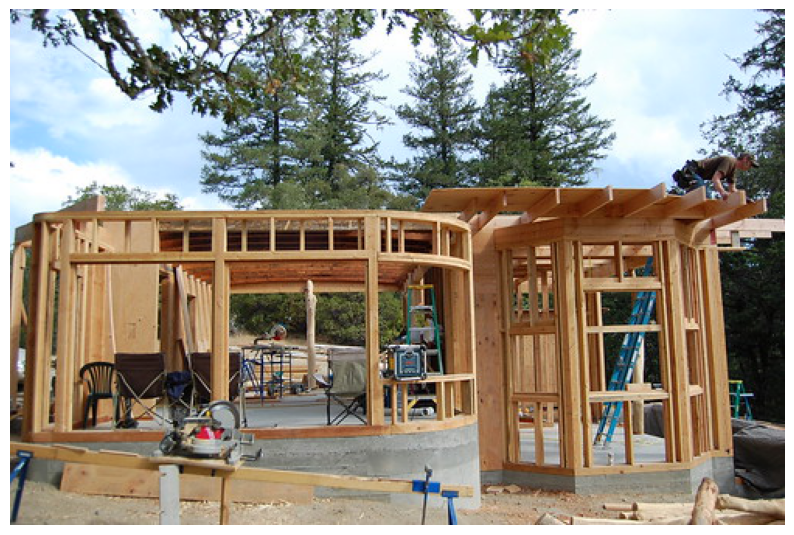

In [28]:
display_image_and_caption(sbu_filter[1])

In [29]:
import os
import json
import requests
from tqdm import tqdm
import hashlib
from concurrent.futures import ThreadPoolExecutor
import random

def create_unique_id(url, caption):
  unique_str = f"{url}{caption}"
  return hashlib.md5(unique_str.encode()).hexdigest()

def download_and_save(args):
  url, caption, img_folder = args
  
  unique_id = create_unique_id(url, caption)
  image_filename = f"{unique_id}.jpg"
  image_path = os.path.join(img_folder, image_filename)
  
  if os.path.exists(image_path):
      return unique_id, True
  
  try:
      response = requests.get(url, timeout=5)
      if response.status_code == 200:
          with open(image_path, 'wb') as f:
              f.write(response.content)
          return unique_id, True
  except:
      return unique_id, False
  
  return unique_id, False

# 读取 ccs_filtered.json
file_path = "datasets/ccs_filtered.json"
with open(file_path, "r", encoding="utf-8") as f:
   ccs_filter = json.load(f)

# 创建目录结构
filter_dir = "SBUfilter2"
filter_img_folder = os.path.join(filter_dir, "images")
os.makedirs(filter_img_folder, exist_ok=True)

# 随机选择10000个样本
filter_indices = random.sample(range(len(ccs_filter)), 1000)

# 准备下载参数
filter_args = [(ccs_filter[i]['url'], ccs_filter[i]['caption'], filter_img_folder) 
             for i in filter_indices]

# 初始化数据记录
filter_info = []

# 使用线程池并行下载
with ThreadPoolExecutor(max_workers=32) as executor:
  print("Processing FILTERED dataset (10000 samples)...")
  for url, caption, _ in tqdm(filter_args):
      unique_id, success = download_and_save((url, caption, filter_img_folder))
      if success:
          filter_info.append({
              "image_id": unique_id,
              "caption": caption,
              "original_url": url
          })

# 保存数据集信息
filter_info_path = os.path.join(filter_dir, "filter_info.json")
with open(filter_info_path, 'w') as f:
  json.dump(filter_info, f, indent=2)

print(f"Successfully downloaded filtered: {len(filter_info)} images")

Processing FILTERED dataset (10000 samples)...


100%|██████████| 1000/1000 [06:51<00:00,  2.43it/s]

Successfully downloaded filtered: 699 images


In [ ]:
 # 加载json信息
with open('SBUfilter2/filter_info.json', 'r') as f:
   filter_info = json.load(f)

# 计算filter2数据集的相似度
print("Computing similarities for FILTER2 dataset...")
filter_similarities = calculate_similarities(filter_info, "SBUfilter2/images")

# 转换为numpy数组以便计算统计信息
filter_scores = np.array([s['similarity'] for s in filter_similarities])

# 打印统计信息
print("\nFILTER2 Dataset Statistics:")
print(f"Number of samples: {len(filter_scores)}")
print(f"Mean similarity: {np.mean(filter_scores):.4f}")
print(f"Std similarity: {np.std(filter_scores):.4f}")
print(f"Min similarity: {np.min(filter_scores):.4f}")
print(f"Max similarity: {np.max(filter_scores):.4f}")

# 保存结果
filter_result_path = os.path.join("SBUfilter2", "similarities.json")
with open(filter_result_path, 'w') as f:
   json.dump(filter_similarities, f, indent=2)

In [2]:
import torch
from lavis.models import load_model_and_preprocess
from PIL import Image
from tqdm import tqdm
import json
import os
import numpy as np

# 加载BLIP模型
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Loading BLIP model...")
model, vis_processors, txt_processors = load_model_and_preprocess(name="blip_feature_extractor", model_type="base", is_eval=True, device=device)


/home/sunj11/anaconda3/envs/lavis/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/sunj11/anaconda3/envs/lavis/lib/python3.8/site-packages/fairscale/experimental/nn/offload.py:19: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  return torch.cuda.amp.custom_fwd(orig_func)  # type: ignore
/home/sunj11/anaconda3/envs/lavis/lib/python3.8/site-packages/fairscale/experimental/nn/offload.py:30: FutureWarning: `torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use `torch.amp.custom_bwd(args..., device_type='cuda')` instead.
  return torch.cuda.amp.custom_bwd(orig_func)  # type: ignore


Loading BLIP model...


/home/sunj11/anaconda3/envs/lavis/lib/python3.8/site-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/sunj11/anaconda3/envs/lavis/lib/python3.8/site-packages/lavis/models/blip_models/blip.py:33: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitl

In [ ]:
def calculate_similarities(info_list, img_folder):
    similarities = []
    model.eval()
    
    for item in tqdm(info_list):
        try:
            # 加载图片
            image_path = os.path.join(img_folder, f"{item['image_id']}.jpg")
            if not os.path.exists(image_path):
                continue
                
            image = Image.open(image_path).convert('RGB')
            
            # 处理图片和文本
            image = vis_processors["eval"](image).unsqueeze(0).to(device)
            text = txt_processors["eval"](item['caption'])
            
            # 计算特征和相似度
            with torch.no_grad():
                sample = {"image": image, "text_input": [text]}
                image_features = model.extract_features(sample, mode="image").image_embeds_proj[:, 0]
                text_features = model.extract_features(sample, mode="text").text_embeds_proj[:, 0]
                
                # 确保所有计算都在GPU上完成后移到CPU
                sim_tensor = (image_features @ text_features.t()) / model.temp
                similarity = sim_tensor.cpu().item()  # 明确移到CPU并转换为Python标量
                
            similarities.append({
                'image_id': item['image_id'],
                'caption': item['caption'],
                'similarity': float(similarity)  # 确保是Python float类型
            })
            
        except Exception as e:
            print(f"Error processing {item['image_id']}: {str(e)}")
            continue
            
    return similarities

# 加载数据并计算相似度
with open('SBUfilter2/filter_info.json', 'r') as f:
    filter_info = json.load(f)

print("Computing similarities using BLIP...")
filter_similarities = calculate_similarities(filter_info, "SBUfilter2/images")

# 计算统计信息 - 现在应该可以正确工作
filter_scores = np.array([s['similarity'] for s in filter_similarities])

print("\nFILTER2 Dataset Statistics:")
print(f"Number of samples: {len(filter_scores)}")
print(f"Mean similarity: {np.mean(filter_scores):.4f}")
print(f"Std similarity: {np.std(filter_scores):.4f}")
print(f"Min similarity: {np.min(filter_scores):.4f}")
print(f"Max similarity: {np.max(filter_scores):.4f}")

# 保存结果
filter_result_path = os.path.join("SBUfilter2", "blip_similarities.json")
with open(filter_result_path, 'w') as f:
    json.dump(filter_similarities, f, indent=2)

In [34]:
def calculate_similarities(info_list, img_folder):
    similarities = []
    model.eval()
    
    for item in tqdm(info_list):
        try:
            # 加载图片
            image_path = os.path.join(img_folder, f"{item['image_id']}.jpg")
            if not os.path.exists(image_path):
                continue
                
            image = Image.open(image_path).convert('RGB')
            
            # 处理图片和文本
            image = vis_processors["eval"](image).unsqueeze(0).to(device)
            text = txt_processors["eval"](item['caption'])
            
            # 计算特征和相似度
            with torch.no_grad():
                sample = {"image": image, "text_input": [text]}
                image_features = model.extract_features(sample, mode="image").image_embeds_proj[:, 0]
                text_features = model.extract_features(sample, mode="text").text_embeds_proj[:, 0]
                
                # 确保所有计算都在GPU上完成后移到CPU
                sim_tensor = (image_features @ text_features.t()) / model.temp
                similarity = sim_tensor.cpu().item()  # 明确移到CPU并转换为Python标量
                
            similarities.append({
                'image_id': item['image_id'],
                'caption': item['caption'],
                'similarity': float(similarity)  # 确保是Python float类型
            })
            
        except Exception as e:
            print(f"Error processing {item['image_id']}: {str(e)}")
            continue
            
    return similarities

# 加载raw数据
with open('SBURAW/raw_info.json', 'r') as f:
   raw_info = json.load(f)

print("Computing similarities using BLIP...")
raw_similarities = calculate_similarities(raw_info, "SBURAW/images")

# 计算统计信息
raw_scores = np.array([s['similarity'] for s in raw_similarities])

print("\nRAW Dataset Statistics:")
print(f"Number of samples: {len(raw_scores)}")
print(f"Mean similarity: {np.mean(raw_scores):.4f}")
print(f"Std similarity: {np.std(raw_scores):.4f}")
print(f"Min similarity: {np.min(raw_scores):.4f}")
print(f"Max similarity: {np.max(raw_scores):.4f}")

# 保存结果
raw_result_path = os.path.join("SBURAW", "blip_similarities.json")
with open(raw_result_path, 'w') as f:
   json.dump(raw_similarities, f, indent=2)

 99%|█████████▊| 6594/6687 [03:21<00:03, 29.91it/s]

Error processing 77a1405000bf18d0c7d72d4f19cb72b0: cannot identify image file '/home/sunj11/Documents/VLM/BLIP/SBURAW/images/77a1405000bf18d0c7d72d4f19cb72b0.jpg'


 99%|█████████▉| 6615/6687 [03:22<00:02, 33.23it/s]

Error processing d9174169a69730d8aacee626bd89b3f7: cannot identify image file '/home/sunj11/Documents/VLM/BLIP/SBURAW/images/d9174169a69730d8aacee626bd89b3f7.jpg'


 99%|█████████▉| 6633/6687 [03:22<00:01, 37.41it/s]

Error processing a1b21b5787a9da0021093d9ca91da524: cannot identify image file '/home/sunj11/Documents/VLM/BLIP/SBURAW/images/a1b21b5787a9da0021093d9ca91da524.jpg'


 99%|█████████▉| 6649/6687 [03:23<00:00, 41.61it/s]

Error processing ff8898e6ff2b63e515eb6b5b198b59a9: cannot identify image file '/home/sunj11/Documents/VLM/BLIP/SBURAW/images/ff8898e6ff2b63e515eb6b5b198b59a9.jpg'


100%|█████████▉| 6663/6687 [03:23<00:00, 32.01it/s]

Error processing b0dea01e7c9ee1abbca69056db8acd03: cannot identify image file '/home/sunj11/Documents/VLM/BLIP/SBURAW/images/b0dea01e7c9ee1abbca69056db8acd03.jpg'


100%|█████████▉| 6677/6687 [03:23<00:00, 36.59it/s]

Error processing c8d414f44610bfda7c206ee2015f8e6c: cannot identify image file '/home/sunj11/Documents/VLM/BLIP/SBURAW/images/c8d414f44610bfda7c206ee2015f8e6c.jpg'


100%|██████████| 6687/6687 [03:24<00:00, 32.76it/s]


RAW Dataset Statistics:
Number of samples: 6465
Mean similarity: 25.5157
Std similarity: 4.7069
Min similarity: -0.0896
Max similarity: 42.0345


In [ ]:
def calculate_similarities(info_list, img_folder):
    similarities = []
    model.eval()
    
    for item in tqdm(info_list):
        try:
            # 加载图片
            image_path = os.path.join(img_folder, f"{item['image_id']}.jpg")
            if not os.path.exists(image_path):
                continue
                
            image = Image.open(image_path).convert('RGB')
            
            # 处理图片和文本
            image = vis_processors["eval"](image).unsqueeze(0).to(device)
            text = txt_processors["eval"](item['caption'])
            
            # 计算特征和相似度
            with torch.no_grad():
                sample = {"image": image, "text_input": [text]}
                image_features = model.extract_features(sample, mode="image").image_embeds_proj[:, 0]
                text_features = model.extract_features(sample, mode="text").text_embeds_proj[:, 0]
                
                # 确保所有计算都在GPU上完成后移到CPU
                sim_tensor = (image_features @ text_features.t()) / model.temp
                similarity = sim_tensor.cpu().item()  # 明确移到CPU并转换为Python标量
                
            similarities.append({
                'image_id': item['image_id'],
                'caption': item['caption'],
                'similarity': float(similarity)  # 确保是Python float类型
            })
            
        except Exception as e:
            print(f"Error processing {item['image_id']}: {str(e)}")
            continue
            
    return similarities

# 加载数据并计算相似度
with open('SBUfilter/filter_info.json', 'r') as f:
    filter_info = json.load(f)

print("Computing similarities using BLIP...")
filter_similarities = calculate_similarities(filter_info, "SBUfilter/images")

# 计算统计信息 - 现在应该可以正确工作
filter_scores = np.array([s['similarity'] for s in filter_similarities])

print("\nFILTER2 Dataset Statistics:")
print(f"Number of samples: {len(filter_scores)}")
print(f"Mean similarity: {np.mean(filter_scores):.4f}")
print(f"Std similarity: {np.std(filter_scores):.4f}")
print(f"Min similarity: {np.min(filter_scores):.4f}")
print(f"Max similarity: {np.max(filter_scores):.4f}")

# 保存结果
filter_result_path = os.path.join("SBUfilter", "blip_similarities.json")
with open(filter_result_path, 'w') as f:
    json.dump(filter_similarities, f, indent=2)

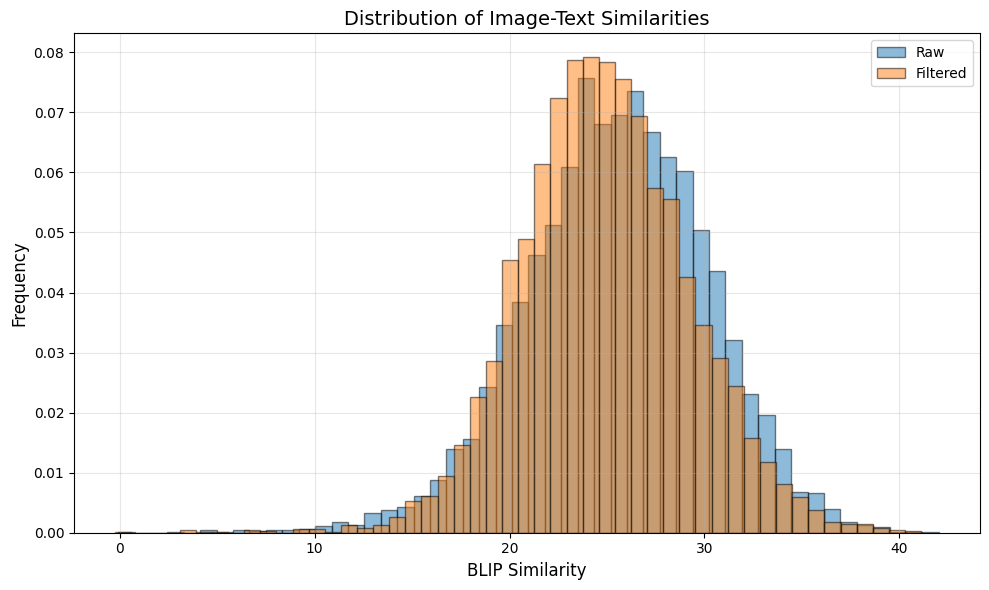


Statistics:
Raw - Mean: 25.5157, Std: 4.7069
Filtered - Mean: 24.9038, Std: 4.3313


In [39]:
import matplotlib.pyplot as plt
import numpy as np

# 取两组数据中较小的长度，确保对比公平
min_length = min(len(raw_scores), len(filter_scores))
raw_scores = raw_scores[:min_length]
filter_scores = filter_scores[:min_length]

plt.figure(figsize=(10, 6))

# 计算每个数据点的权重（使频率和为1）
weights_raw = np.ones_like(raw_scores) / len(raw_scores)
weights_filter = np.ones_like(filter_scores) / len(filter_scores)

# 绘制直方图
plt.hist(raw_scores, bins=50, alpha=0.5, weights=weights_raw,
         label='Raw', edgecolor='black')
plt.hist(filter_scores, bins=50, alpha=0.5, weights=weights_filter,
         label='Filtered', edgecolor='black')

plt.xlabel('BLIP Similarity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Image-Text Similarities', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# 设置轴标签字体大小
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

# 打印统计信息
print("\nStatistics:")
print(f"Raw - Mean: {np.mean(raw_scores):.4f}, Std: {np.std(raw_scores):.4f}")
print(f"Filtered - Mean: {np.mean(filter_scores):.4f}, Std: {np.std(filter_scores):.4f}")

Processing batch 1... (Current total: 0)


100%|██████████| 1000/1000 [00:59<00:00, 16.85it/s]


Batch 1 completed. Saved 5 records to raw_info.json
Processing batch 2... (Current total: 5)


100%|██████████| 1000/1000 [01:00<00:00, 16.57it/s]


Batch 2 completed. Saved 13 records to raw_info.json
Processing batch 3... (Current total: 13)


100%|██████████| 1000/1000 [01:10<00:00, 14.21it/s]


Batch 3 completed. Saved 34 records to raw_info.json
Processing batch 4... (Current total: 34)


100%|██████████| 1000/1000 [01:02<00:00, 16.12it/s]


Batch 4 completed. Saved 45 records to raw_info.json
Processing batch 5... (Current total: 45)


100%|██████████| 1000/1000 [00:58<00:00, 17.22it/s]


Batch 5 completed. Saved 47 records to raw_info.json
Processing batch 6... (Current total: 47)


 57%|█████▋    | 573/1000 [00:33<00:26, 16.32it/s]

In [3]:
def calculate_similarities(info_list, img_folder):
    similarities = []
    model.eval()
    
    for item in tqdm(info_list):
        try:
            # 加载图片
            image_path = os.path.join(img_folder, f"{item['image_id']}.jpg")
            if not os.path.exists(image_path):
                continue
                
            image = Image.open(image_path).convert('RGB')
            
            # 处理图片和文本
            image = vis_processors["eval"](image).unsqueeze(0).to(device)
            text = txt_processors["eval"](item['caption'])
            
            # 计算特征和相似度
            with torch.no_grad():
                sample = {"image": image, "text_input": [text]}
                image_features = model.extract_features(sample, mode="image").image_embeds_proj[:, 0]
                text_features = model.extract_features(sample, mode="text").text_embeds_proj[:, 0]
                
                # 确保所有计算都在GPU上完成后移到CPU
                sim_tensor = (image_features @ text_features.t()) / model.temp
                similarity = sim_tensor.cpu().item()  # 明确移到CPU并转换为Python标量
                
            similarities.append({
                'image_id': item['image_id'],
                'caption': item['caption'],
                'similarity': float(similarity)  # 确保是Python float类型
            })
            
        except Exception as e:
            print(f"Error processing {item['image_id']}: {str(e)}")
            continue
            
    return similarities

# 加载raw数据
with open('SBURAW2/raw_info.json', 'r') as f:
   raw_info = json.load(f)

print("Computing similarities using BLIP...")
raw_similarities = calculate_similarities(raw_info, "SBURAW2/images")

# 计算统计信息
raw_scores = np.array([s['similarity'] for s in raw_similarities])

print("\nRAW Dataset Statistics:")
print(f"Number of samples: {len(raw_scores)}")
print(f"Mean similarity: {np.mean(raw_scores):.4f}")
print(f"Std similarity: {np.std(raw_scores):.4f}")
print(f"Min similarity: {np.min(raw_scores):.4f}")
print(f"Max similarity: {np.max(raw_scores):.4f}")

# 保存结果
raw_result_path = os.path.join("SBURAW2", "blip_similarities.json")
with open(raw_result_path, 'w') as f:
   json.dump(raw_similarities, f, indent=2)

Computing similarities using BLIP...


100%|██████████| 2324/2324 [00:43<00:00, 53.85it/s]


RAW Dataset Statistics:
Number of samples: 2324
Mean similarity: 22.3184
Std similarity: 3.9037
Min similarity: 7.2709
Max similarity: 34.0674


In [5]:
# 加载json文件
filter_result_path = os.path.join("SBUfilter", "blip_similarities.json")
with open(filter_result_path, 'r') as f:
    filter_similarities = json.load(f)

# 转换为numpy数组以便计算
filter_scores = np.array([s['similarity'] for s in filter_similarities])

# 可以打印一些基本统计信息
print(f"Total samples: {len(filter_scores)}")
print(f"Mean similarity: {np.mean(filter_scores):.4f}")
print(f"Std similarity: {np.std(filter_scores):.4f}")
print(f"Min similarity: {np.min(filter_scores):.4f}")
print(f"Max similarity: {np.max(filter_scores):.4f}")

Total samples: 6932
Mean similarity: 26.3339
Std similarity: 3.7339
Min similarity: 4.0798
Max similarity: 39.5917


In [6]:
import json
import numpy as np

# 加载json文件 
raw_result_path = os.path.join("SBURAW", "blip_similarities.json")
with open(raw_result_path, 'r') as f:
   raw_similarities = json.load(f)

# 转换为numpy数组
raw_scores = np.array([s['similarity'] for s in raw_similarities])

print("\nRAW Statistics:")
print(f"Total samples: {len(raw_scores)}")
print(f"Mean similarity: {np.mean(raw_scores):.4f}")
print(f"Std similarity: {np.std(raw_scores):.4f}")
print(f"Min similarity: {np.min(raw_scores):.4f}")
print(f"Max similarity: {np.max(raw_scores):.4f}")


RAW Statistics:
Total samples: 6465
Mean similarity: 25.5157
Std similarity: 4.7069
Min similarity: -0.0896
Max similarity: 42.0345


In [7]:
import json
import numpy as np

# 加载json文件 
raw2_result_path = os.path.join("SBURAW2", "blip_similarities.json")
with open(raw2_result_path, 'r') as f:
   raw2_similarities = json.load(f)

# 转换为numpy数组
raw2_scores = np.array([s['similarity'] for s in raw2_similarities])

print("\nRAW2 Statistics:")
print(f"Total samples: {len(raw2_scores)}")
print(f"Mean similarity: {np.mean(raw2_scores):.4f}")
print(f"Std similarity: {np.std(raw2_scores):.4f}")
print(f"Min similarity: {np.min(raw2_scores):.4f}")
print(f"Max similarity: {np.max(raw2_scores):.4f}")


RAW2 Statistics:
Total samples: 2324
Mean similarity: 22.3184
Std similarity: 3.9037
Min similarity: 7.2709
Max similarity: 34.0674


In [ ]:

import matplotlib.pyplot as plt
import numpy as np

# 合并raw scores并归一化
combined_raw_scores = np.concatenate([raw_scores, raw2_scores]) / 100
normalized_filter_scores = filter_scores / 100

plt.figure(figsize=(10, 6))

# 计算权重使频率和为1
weights_raw = np.ones_like(combined_raw_scores) / len(combined_raw_scores)
weights_filter = np.ones_like(normalized_filter_scores) / len(normalized_filter_scores)

# 绘制直方图
plt.hist(combined_raw_scores, bins=50, alpha=0.5, weights=weights_raw,
         label='Raw', edgecolor='black')
plt.hist(normalized_filter_scores, bins=50, alpha=0.5, weights=weights_filter,
         label='Filtered', edgecolor='black')

plt.xlabel('BLIP image-text cosine similarity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
# plt.title('Distribution of Normalized Image-Text Similarities', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

# 打印统计信息
print("\nNormalized Combined RAW Statistics:")
print(f"Total samples: {len(combined_raw_scores)}")
print(f"Mean similarity: {np.mean(combined_raw_scores):.4f}")
print(f"Std similarity: {np.std(combined_raw_scores):.4f}")
print(f"Min similarity: {np.min(combined_raw_scores):.4f}")
print(f"Max similarity: {np.max(combined_raw_scores):.4f}")

print("\nNormalized FILTER Statistics:")
print(f"Total samples: {len(normalized_filter_scores)}")
print(f"Mean similarity: {np.mean(normalized_filter_scores):.4f}")
print(f"Std similarity: {np.std(normalized_filter_scores):.4f}")
print(f"Min similarity: {np.min(normalized_filter_scores):.4f}")
print(f"Max similarity: {np.max(normalized_filter_scores):.4f}")


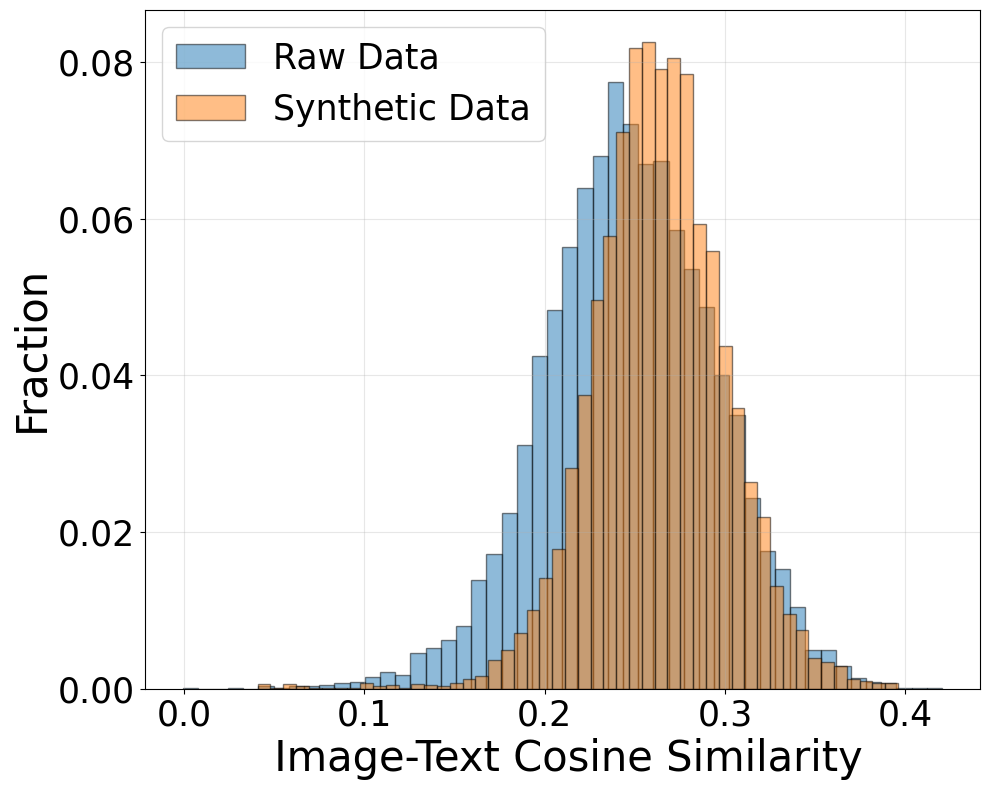


Normalized Combined RAW Statistics:
Total samples: 8789
Mean similarity: 0.2467
Std similarity: 0.0472
Min similarity: -0.0009
Max similarity: 0.4203

Normalized FILTER Statistics:
Total samples: 6932
Mean similarity: 0.2633
Std similarity: 0.0373
Min similarity: 0.0408
Max similarity: 0.3959


In [18]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 8))

# 计算权重使频率和为1
weights_raw = np.ones_like(combined_raw_scores) / len(combined_raw_scores)
weights_filter = np.ones_like(normalized_filter_scores) / len(normalized_filter_scores)

# 绘制直方图
plt.hist(combined_raw_scores, bins=50, alpha=0.5, weights=weights_raw,
        label='Raw Data', edgecolor='black')
plt.hist(normalized_filter_scores, bins=50, alpha=0.5, weights=weights_filter,
        label='Synthetic Data', edgecolor='black')

plt.xlabel(' Image-Text Cosine Similarity', fontsize=30)
plt.ylabel('Fraction', fontsize=30)
# plt.title('Distribution of Normalized Image-Text Similarities', fontsize=30)
plt.legend(fontsize=25)
plt.grid(True, alpha=0.3)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
# plt.gca().xaxis.set_major_locator(plt.MultipleLocator(0.5))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.02))

plt.tight_layout()

# 保存图片
plt.savefig('image/blip_similarity_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# 打印统计信息
print("\nNormalized Combined RAW Statistics:")
print(f"Total samples: {len(combined_raw_scores)}")
print(f"Mean similarity: {np.mean(combined_raw_scores):.4f}")
print(f"Std similarity: {np.std(combined_raw_scores):.4f}")
print(f"Min similarity: {np.min(combined_raw_scores):.4f}")
print(f"Max similarity: {np.max(combined_raw_scores):.4f}")

print("\nNormalized FILTER Statistics:")
print(f"Total samples: {len(normalized_filter_scores)}")
print(f"Mean similarity: {np.mean(normalized_filter_scores):.4f}")
print(f"Std similarity: {np.std(normalized_filter_scores):.4f}")
print(f"Min similarity: {np.min(normalized_filter_scores):.4f}")
print(f"Max similarity: {np.max(normalized_filter_scores):.4f}")